### Import libraries


In [3]:
import numpy as np
import pandas as pd
import os

In [4]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications import VGG16
from keras.models import Model
from keras.utils import to_categorical

### Iterate over all training images and load them into memory

In [5]:
X,Y = [],[]
for folder in os.listdir('training'):
    label = int(folder[1])
    label_co = to_categorical(label, num_classes=10)[0]
    for im in os.listdir(os.path.join('training',folder)):
        path = os.path.join(os.path.join('training',folder),im)
        img = image.load_img(path, target_size=(224,224))
        img = image.img_to_array(img)
        img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
        img = preprocess_input(img)
        X.append(img[0])
        Y.append(label_co)
        if len(X)%200 == 0:
            print(len(X))

200
400
600
800
1000


In [6]:
x_train, y_train = np.array(X), np.array(Y)

In [7]:
# print number of training files

print(x_train.shape,y_train.shape)

(1098, 224, 224, 3) (1098, 10)


### Same for validation data

In [8]:
X,Y = [],[]
for folder in os.listdir('validation'):
    label = int(folder[1])
    label_co = to_categorical(label, num_classes=10)[0]
    for im in os.listdir(os.path.join('validation',folder)):
        path = os.path.join(os.path.join('validation',folder),im)
        img = image.load_img(path, target_size=(224,224))
        img = image.img_to_array(img)
        img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
        img = preprocess_input(img)
        X.append(img[0])
        Y.append(label_co)
        if len(X)%200 == 0:
            print(len(X))

200


In [9]:
x_val, y_val = np.array(X), np.array(Y)

In [10]:
# print number of validation files

print(x_val.shape,y_val.shape)

(272, 224, 224, 3) (272, 10)


## train

In [11]:
from keras.models import Model
from keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# input features
in1 = layers.Input(shape=(224,224,3,))

X = layers.Conv2D(128,5,padding='valid',activation='relu')(in1)
X = layers.GlobalAveragePooling2D()(X)

# a fully connected layer with dropout
X = layers.Dense(1024,activation='relu')(X)
X = layers.Dropout(0.7)(X)

# final layer
X = layers.Dense(10,activation='softmax')(X)

model = Model(inputs=in1,outputs=X)

In [13]:
# compilation model.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 128)     9728      
_________________________________________________________________
global_average_pooling2d_1 ( (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              132096    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 152,074
Trainable params: 152,074
Non-trainable params: 0
_________________________________________________________________


In [15]:
# specify the number of epochs that you would like to use to train the model.

hist = model.fit(x_train,y_train,validation_data=[x_val,y_val],epochs=16,verbose=2)

Train on 1098 samples, validate on 272 samples
Epoch 1/16
 - 11s - loss: 4.5957 - acc: 0.1630 - val_loss: 2.1734 - val_acc: 0.2537
Epoch 2/16
 - 8s - loss: 2.4862 - acc: 0.1840 - val_loss: 1.9223 - val_acc: 0.3493
Epoch 3/16
 - 8s - loss: 2.1636 - acc: 0.2350 - val_loss: 1.9367 - val_acc: 0.3382
Epoch 4/16
 - 8s - loss: 2.1432 - acc: 0.2413 - val_loss: 1.9097 - val_acc: 0.3419
Epoch 5/16
 - 8s - loss: 2.1099 - acc: 0.2459 - val_loss: 1.9425 - val_acc: 0.3235
Epoch 6/16
 - 8s - loss: 2.0895 - acc: 0.2614 - val_loss: 1.9210 - val_acc: 0.3162
Epoch 7/16
 - 8s - loss: 2.0706 - acc: 0.2514 - val_loss: 1.9979 - val_acc: 0.2757
Epoch 8/16
 - 8s - loss: 2.0003 - acc: 0.2732 - val_loss: 1.9438 - val_acc: 0.2904
Epoch 9/16
 - 8s - loss: 2.0046 - acc: 0.2559 - val_loss: 1.8818 - val_acc: 0.3603
Epoch 10/16
 - 8s - loss: 1.9746 - acc: 0.2678 - val_loss: 1.9497 - val_acc: 0.3272
Epoch 11/16
 - 8s - loss: 2.0063 - acc: 0.2623 - val_loss: 1.8922 - val_acc: 0.3346
Epoch 12/16
 - 8s - loss: 1.9387 - ac

### plot training history


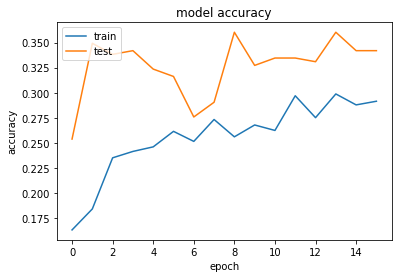

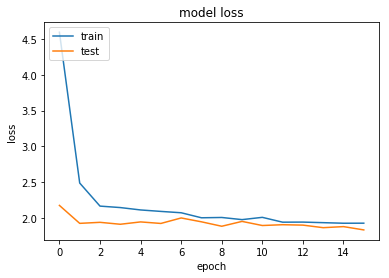

In [16]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()